# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

Loan default prediction is crucial for financial institutions to minimize losses and maintain financial health. Early identification of high-risk applicants helps in informed lending decisions.

### **The objective:**

To build a predictive model that accurately classifies loan applicants as defaulters or non-defaulters based on their financial and personal attributes.

### **The key questions:**

* Which variables are most indicative of default risk?

* Can we predict default status accurately before loan approval?

* How do different models (Logistic, Tree, Forest) perform in comparison?

### **The problem formulation**:
This is a binary classification problem where the goal is to predict whether a borrower will default (1) or not (0) using supervised machine learning techniques.

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [5]:
# Data handling
import pandas as pd
import numpy as np


# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Library to split data
from sklearn.model_selection import train_test_split

# Model building
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# To encode categorical variables
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Metrics to evaluate the model
from sklearn import metrics
from sklearn import tree

# To scale the data using z-score
from sklearn.preprocessing import StandardScaler

# Evaluation metrics

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
# For tuning the model
from sklearn.model_selection import GridSearchCV

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")
# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# setting the precision of floating numbers to 2 decimal points
pd.set_option("display.float_format", lambda x: "%.2f" % x)



## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [8]:
df = pd.read_csv ("C:/Users/Yenu5/OneDrive/Desktop/Data Science/hmeq.csv")   

In [9]:
# Understanding the shape of the dataset
print("Shape of the dataset:", df.shape)


Shape of the dataset: (5960, 13)


In [10]:
# Display the first 5 rows
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.00,39025.00,HomeImp,Other,10.50,0.00,0.00,94.37,1.00,9.00,NaN
1,1,1300,70053.00,68400.00,HomeImp,Other,7.00,0.00,2.00,121.83,0.00,14.00,NaN
2,1,1500,13500.00,16700.00,HomeImp,Other,4.00,0.00,0.00,149.47,1.00,10.00,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.00,112000.00,HomeImp,Office,3.00,0.00,0.00,93.33,0.00,14.00,NaN


In [11]:
# Check data types
print(df.dtypes)

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


In [12]:
# Check for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [13]:
# Check for duplicated rows
duplicate_count = df.duplicated().sum()

print(f"Number of duplicated rows: {duplicate_count}")

Number of duplicated rows: 0


In [14]:
# Select object type columns
cols = df.select_dtypes(['object']).columns.tolist()

# Add target variable if it's categorical
cols.append('BAD')

# Convert columns to 'category' type
for i in cols:
    df[i] = df[i].astype('category')


## Summary Statistics

In [16]:
# Analyze the summary statistics for numerical variables
df.describe().T


,count,mean,std,min,25%,50%,75%,max
LOAN,5960.00,18607.97,11207.48,1100.00,11100.00,16300.00,23300.00,89900.00
MORTDUE,5442.00,73760.82,44457.61,2063.00,46276.00,65019.00,91488.00,399550.00
VALUE,5848.00,101776.05,57385.78,8000.00,66075.50,89235.50,119824.25,855909.00
YOJ,5445.00,8.92,7.57,0.00,3.00,7.00,13.00,41.00
DEROG,5252.00,0.25,0.85,0.00,0.00,0.00,0.00,10.00
DELINQ,5380.00,0.45,1.13,0.00,0.00,0.00,0.00,15.00
CLAGE,5652.00,179.77,85.81,0.00,115.12,173.47,231.56,1168.23
NINQ,5450.00,1.19,1.73,0.00,0.00,1.00,2.00,17.00
CLNO,5738.00,21.30,10.14,0.00,15.00,20.00,26.00,71.00
DEBTINC,4693.00,33.78,8.60,0.52,29.14,34.82,39.00,203.31


- Observations from Summary Statistics

In [18]:
# Checking the count of unique values in each categorical column
cols_cat = df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in', i, 'are:')
    print(df[i].unique())
    print('-' * 40)


Unique values in BAD are:
[1, 0]
Categories (2, int64): [0, 1]
----------------------------------------
Unique values in REASON are:
['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
----------------------------------------
Unique values in JOB are:
['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
----------------------------------------


## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


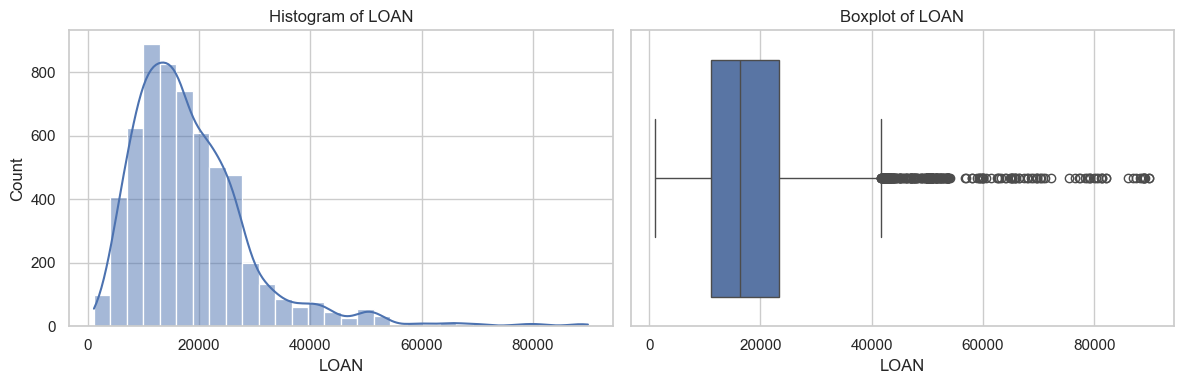

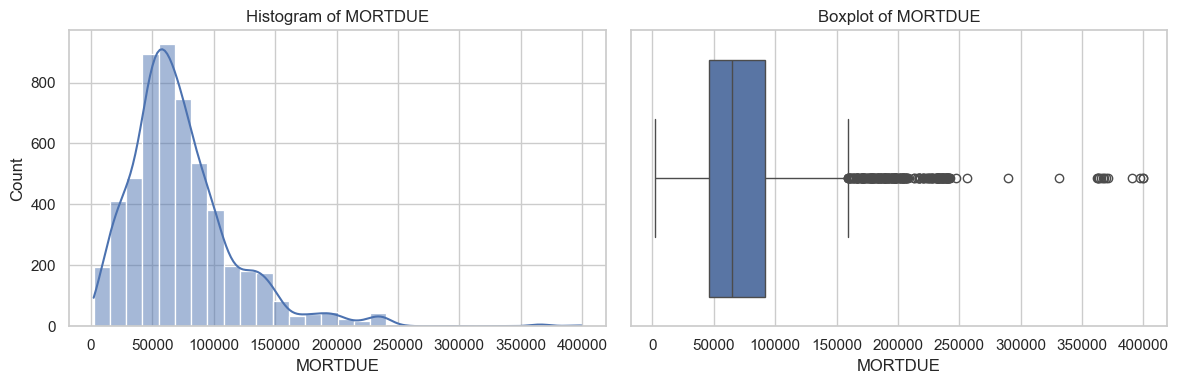

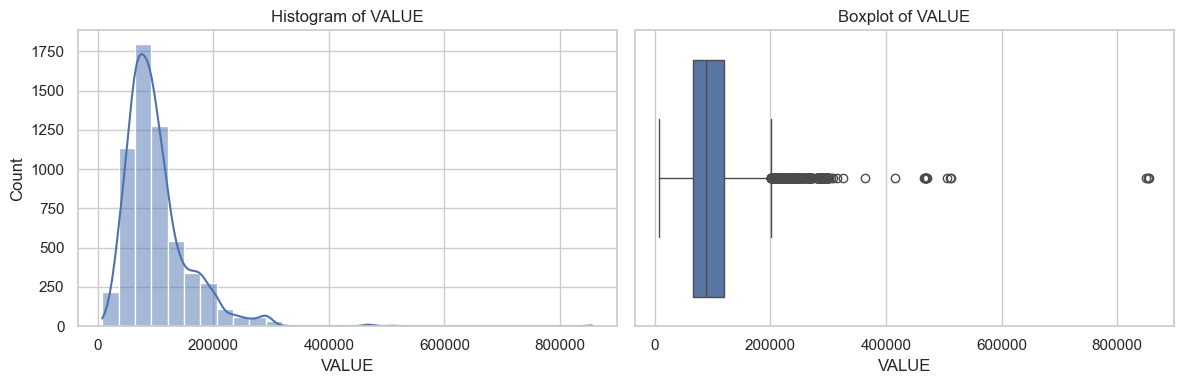

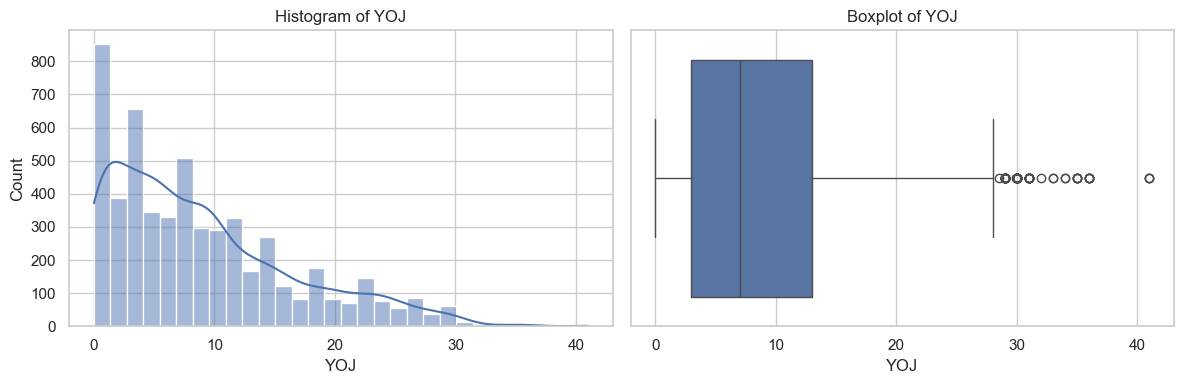

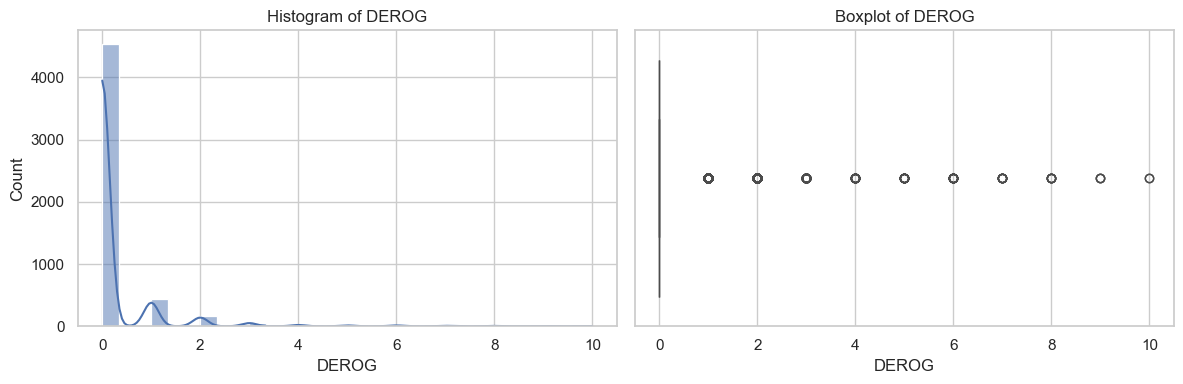

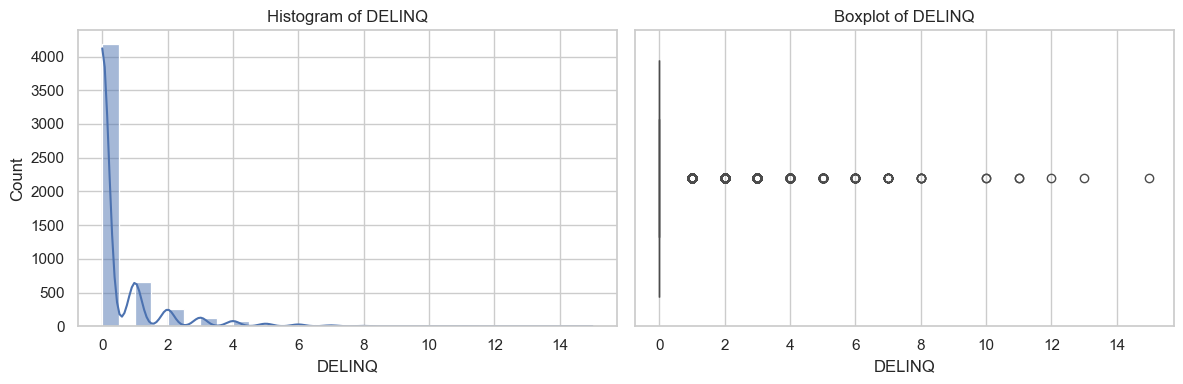

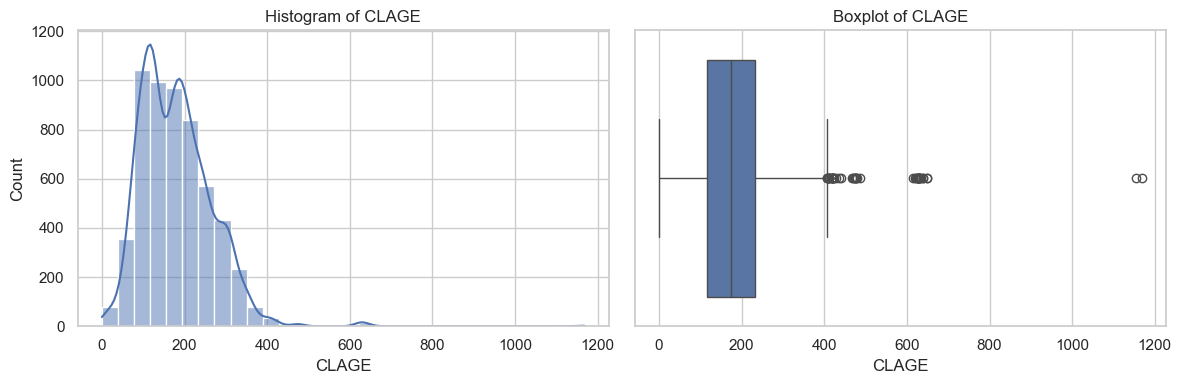

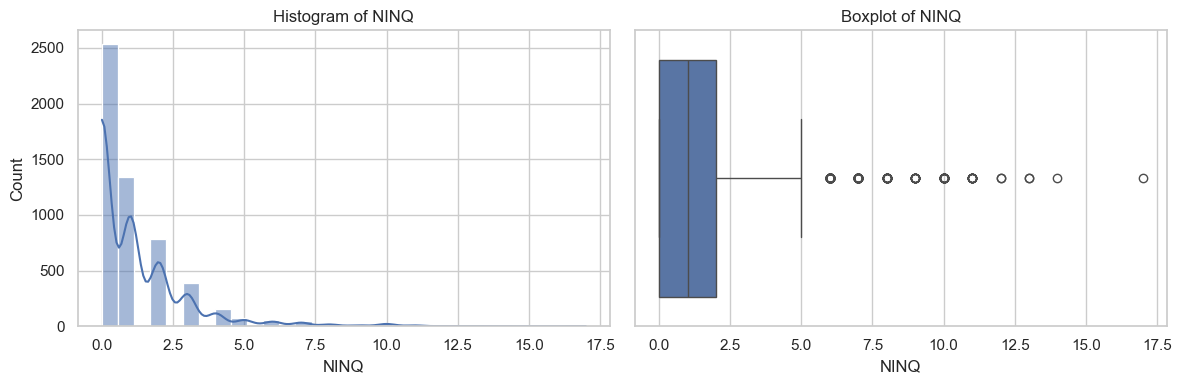

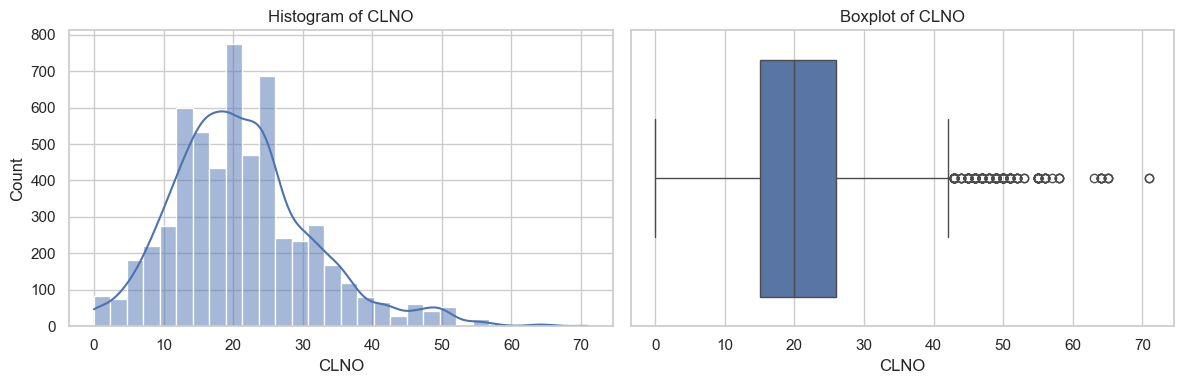

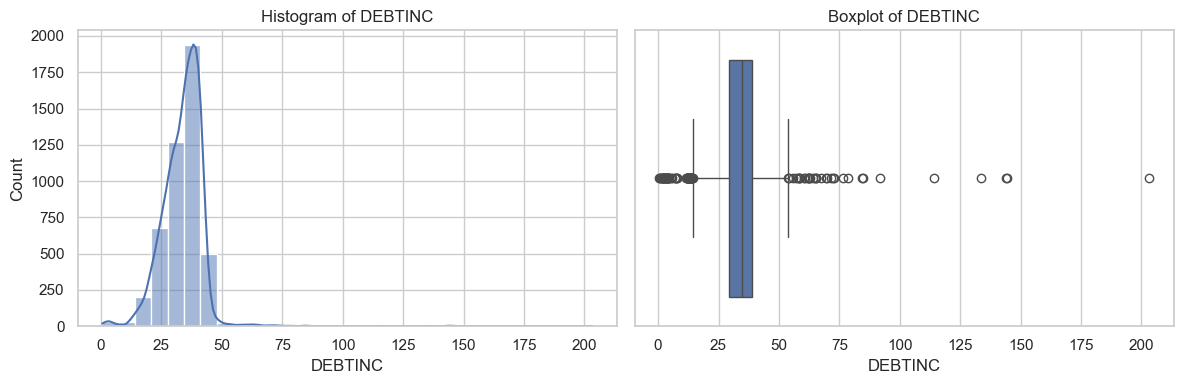

In [23]:


# Select numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical column and plot histogram & boxplot
for col in num_cols:
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


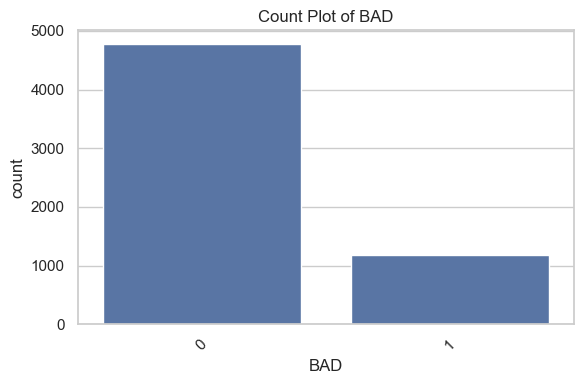

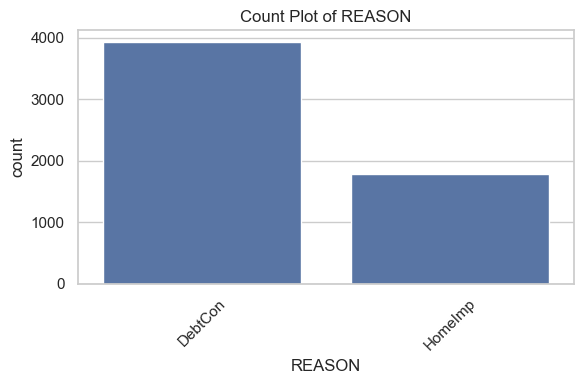

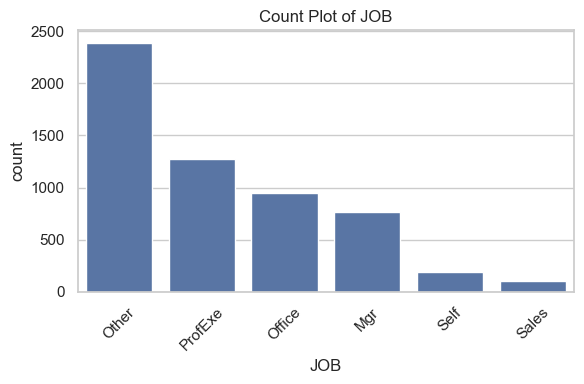

In [24]:


# Select categorical columns
cat_cols = df.select_dtypes(include='category').columns

# Loop through each categorical column and plot
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


### **Bivariate Analysis**

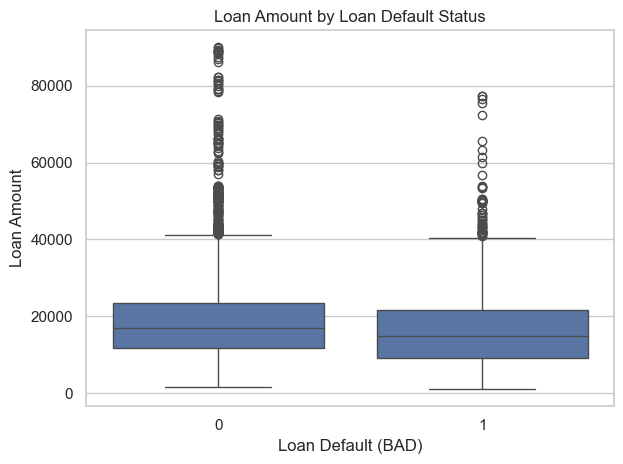

In [26]:
# LOAN amount distribution by loan default (BAD)
sns.boxplot(x='BAD', y='LOAN', data=df)
plt.title('Loan Amount by Loan Default Status')
plt.xlabel('Loan Default (BAD)')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

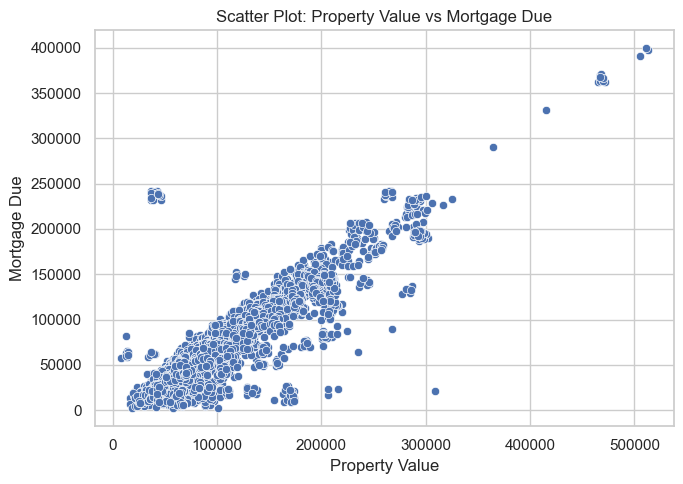

In [27]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df["VALUE"], y=df["MORTDUE"])
plt.title("Scatter Plot: Property Value vs Mortgage Due")
plt.xlabel("Property Value")
plt.ylabel("Mortgage Due")
plt.tight_layout()
plt.show()

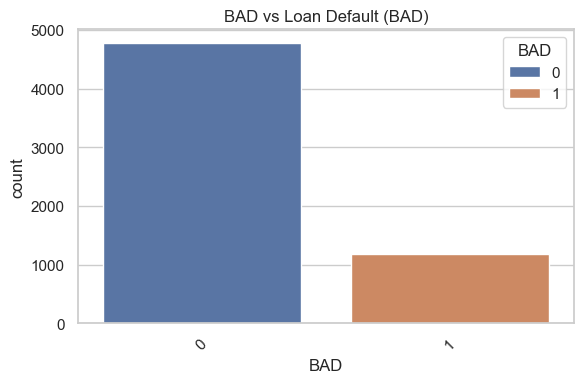

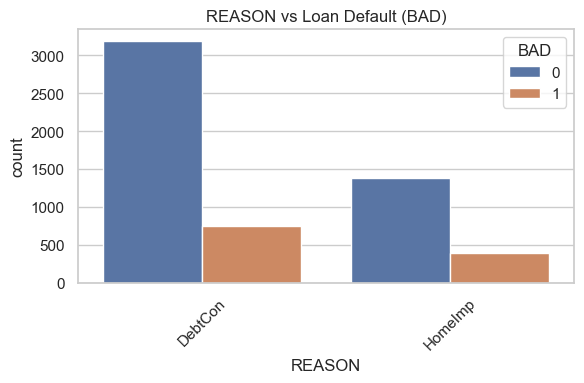

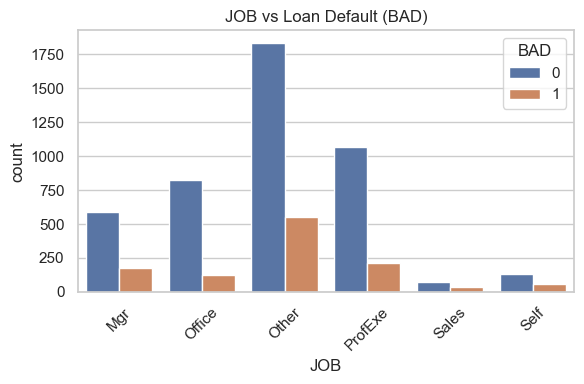

In [28]:
# Select categorical columns
cat_cols = df.select_dtypes(include='category').columns

# Plot for each categorical column vs BAD
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue='BAD', data=df)
    plt.title(f'{col} vs Loan Default (BAD)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### **Multivariate Analysis**

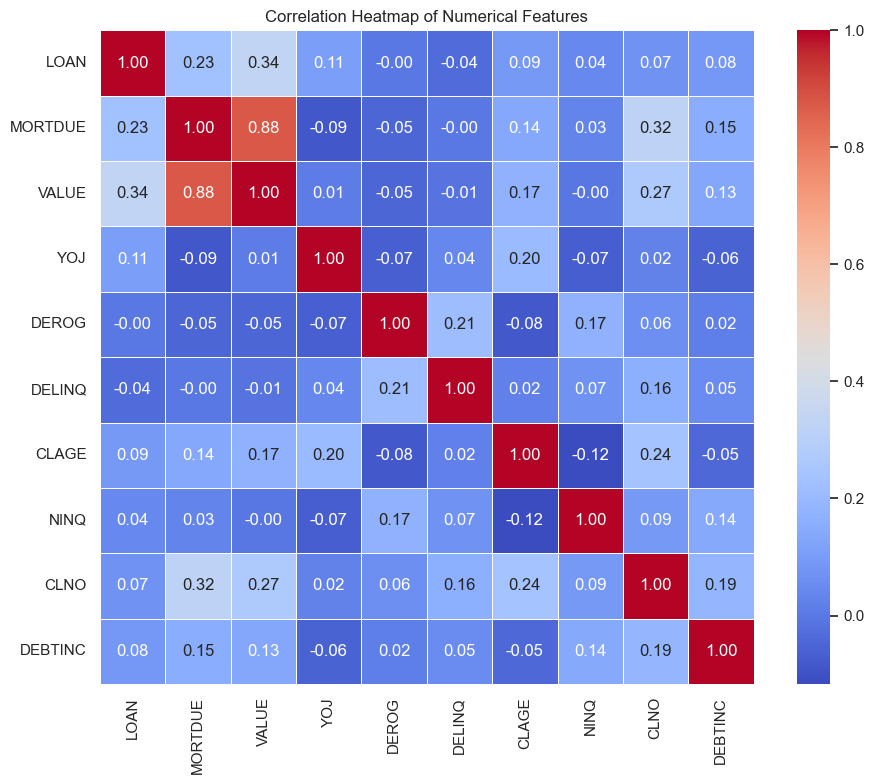

In [30]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df[num_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

## Treating Outliers

In [32]:
import numpy as np

def treat_outliers(df, col):
    '''
    Treats outliers in a variable
    col: str, name of the numerical variable
    df: DataFrame
    '''
    Q1 = df[col].quantile(0.25)            # 25th quantile
    Q3 = df[col].quantile(0.75)            # 75th quantile
    IQR = Q3 - Q1                          # IQR Range

    Lower_Whisker = Q1 - 1.5 * IQR         # define lower whisker
    Upper_Whisker = Q3 + 1.5 * IQR         # define upper whisker

    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)  # clip values outside the whiskers
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df

In [33]:
df_raw = df.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

## Treating Missing Values

In [35]:
# Fill missing values in all columns using mode
for col in df.columns:
    mode_val = df[col].mode()[0]  # Get the most frequent value
    df[col].fillna(mode_val, inplace=True)
    # Check for missing values

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values[missing_values > 0])

Missing values in each column:
Series([], dtype: int64)


## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

* The dataset is imbalanced with fewer defaulted applicants (BAD = 1) compared to non-defaulters

* Most numeric features show low to moderate correlation.

* The heatmap reveals a strong correlation between VALUE and MORTDUE, while most other features show low inter-correlation, indicating minimal  multicollinearity and diverse predictive value.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [39]:
# Data preparation

# Separate features (X) and target (y)
X = df.drop('BAD', axis=1)
y = df['BAD']

# If categorical columns exist, encode them first (optional step)
# X = pd.get_dummies(X, drop_first=True)

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)


Train set size: (4768, 12)
Test set size: (1192, 12)


### Logistic Regression

In [41]:
# One-hot encode all categorical variables
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns in train and test sets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# Train logistic regression
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_encoded, y_train)




LogisticRegression(max_iter=1000)

Classification Report (Train Set):

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      3817
           1       0.76      0.22      0.34       951

    accuracy                           0.83      4768
   macro avg       0.80      0.60      0.62      4768
weighted avg       0.82      0.83      0.79      4768



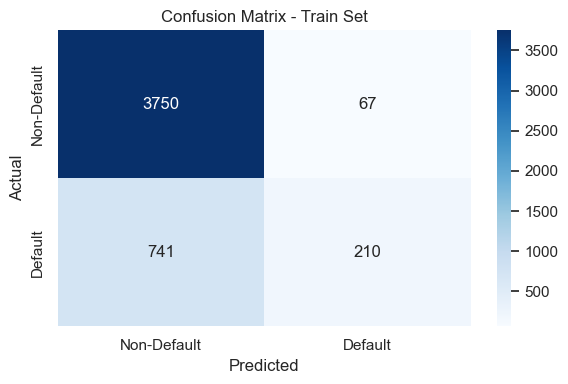

In [42]:
# Step 1: Re-encode X_train using the same method used during model training
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

# Step 2: Align columns (in case some dummies are missing due to rare categories)
X_train_encoded = X_train_encoded.reindex(columns=log_model.feature_names_in_, fill_value=0)

# Step 3: Predict on encoded training data
y_train_pred = log_model.predict(X_train_encoded)

# Step 4: Evaluate

print("Classification Report (Train Set):\n")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.84      0.98      0.91       954
           1       0.80      0.25      0.38       238

    accuracy                           0.84      1192
   macro avg       0.82      0.62      0.65      1192
weighted avg       0.83      0.84      0.80      1192



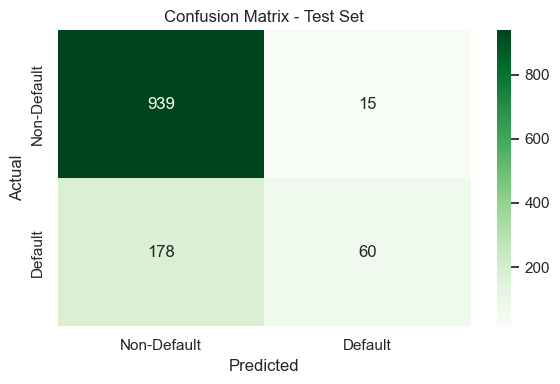

In [43]:
# Step 1: Encode the test data using same dummy logic
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Step 2: Align columns with training set
X_test_encoded = X_test_encoded.reindex(columns=log_model.feature_names_in_, fill_value=0)

# Step 3: Predict on test data
y_test_pred = log_model.predict(X_test_encoded)

# Step 4: Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'C': 100, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report (Train Set):

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      3817
           1       0.71      0.37      0.48       951

    accuracy                           0.84      4768
   macro avg       0.78      0.67      0.70      4768
weighted avg       0.83      0.84      0.82      4768



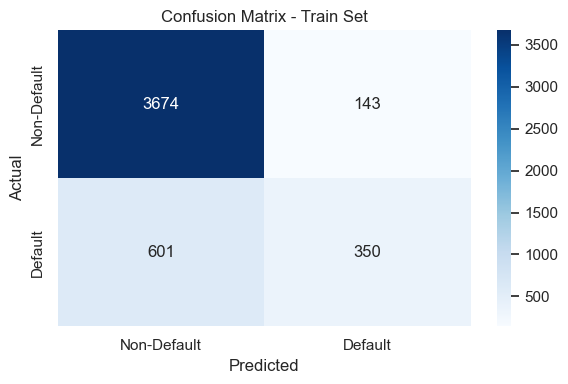


Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       954
           1       0.76      0.40      0.52       238

    accuracy                           0.85      1192
   macro avg       0.81      0.68      0.72      1192
weighted avg       0.84      0.85      0.84      1192



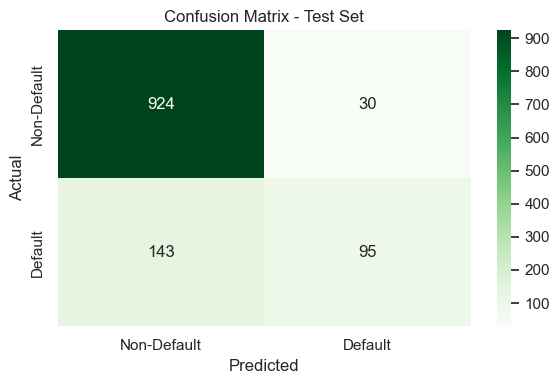


Train vs Test Performance Comparison:


,Set,Accuracy,Precision,Recall,F1 Score
0,Train,0.84,0.71,0.37,0.48
1,Test,0.85,0.76,0.40,0.52


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 0: Encode training and test datasets
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Align columns of test set to match training set
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

# Step 1: Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # liblinear supports both l1 and l2
    'max_iter': [100, 200, 500]
}

# Step 2: Initialize the model
log_model = LogisticRegression()

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_model,
                           param_grid=param_grid,
                           scoring='f1',
                           cv=5,
                           verbose=1)

# Step 4: Fit Grid Search on training data
grid_search.fit(X_train_encoded, y_train)

# Step 5: Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Step 6: Use the best model
log_model = grid_search.best_estimator_

# --------------------------
# Evaluation on Train Set
# --------------------------

# Re-align X_train
X_train_encoded = X_train_encoded.reindex(columns=log_model.feature_names_in_, fill_value=0)
y_train_pred = log_model.predict(X_train_encoded)

print("\nClassification Report (Train Set):\n")
print(classification_report(y_train, y_train_pred))

# Confusion Matrix - Train
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --------------------------
# Evaluation on Test Set
# --------------------------

# Re-align test features
X_test_encoded = X_test_encoded.reindex(columns=log_model.feature_names_in_, fill_value=0)
y_test_pred = log_model.predict(X_test_encoded)

print("\nClassification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred))

# Confusion Matrix - Test
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# --------------------------
# Summary Comparison Table
# --------------------------

metrics = {
    "Set": ["Train", "Test"],
    "Accuracy": [accuracy_score(y_train, y_train_pred), accuracy_score(y_test, y_test_pred)],
    "Precision": [precision_score(y_train, y_train_pred), precision_score(y_test, y_test_pred)],
    "Recall": [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred)],
    "F1 Score": [f1_score(y_train, y_train_pred), f1_score(y_test, y_test_pred)]
}

eval_df = pd.DataFrame(metrics)
print("\nTrain vs Test Performance Comparison:")
display(eval_df)



In [45]:

# Get feature names (they're already aligned with encoded input)
feature_names = log_model.feature_names_in_

# Get coefficients from the trained model
coefficients = log_model.coef_[0]

# Create a DataFrame for better readability
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute value (importance)
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Display top variables
print("Top Variables Influencing Loan Default (Logistic Regression):")
print(coef_df[['Feature', 'Coefficient']].head(15))


Top Variables Influencing Loan Default (Logistic Regression):
           Feature  Coefficient
14       JOB_Sales         0.90
11      JOB_Office        -0.67
13     JOB_ProfExe        -0.55
7             NINQ         0.28
10  REASON_HomeImp         0.27
9          DEBTINC        -0.09
15        JOB_Self         0.06
12       JOB_Other        -0.03
3              YOJ        -0.01
6            CLAGE        -0.00
8             CLNO         0.00
0             LOAN        -0.00
2            VALUE         0.00
1          MORTDUE        -0.00
4            DEROG         0.00


### Decision Tree

In [47]:
# Identify categorical columns
cat_cols = X_train.select_dtypes(include='category').columns.tolist()

# Identify numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Combine both for one-hot encoding
X_train_tree = pd.get_dummies(X_train, drop_first=True)
X_test_tree = pd.get_dummies(X_test, drop_first=True)

# Align train and test (important: ensures both have same columns)
X_train_tree, X_test_tree = X_train_tree.align(X_test_tree, join='left', axis=1, fill_value=0)


In [48]:
# Target variable
y = df['BAD']

# Feature variables (drop the target)
X = df.drop('BAD', axis=1)


In [49]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [50]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [51]:

# Define the model with custom class weights
tree_model = DecisionTreeClassifier(
    class_weight={0: 0.2, 1: 0.8},  # Give more weight to defaulters (BAD=1)
    random_state=42
)

# Fit the model on encoded training data
tree_model.fit(X_train_tree, y_train)


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=42)

Classification Report (Train Set):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



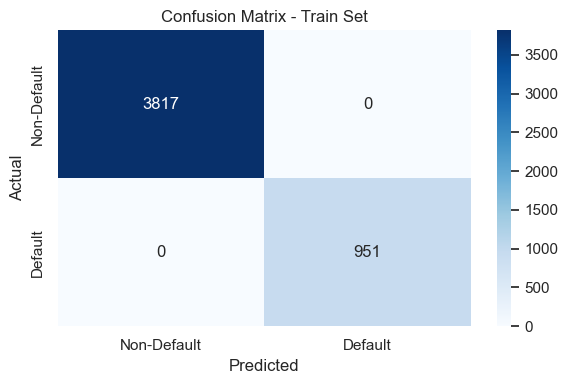

In [52]:
#@title
# Checking performance on the training data


y_train_pred_tree = tree_model.predict(X_train_tree)

print("Classification Report (Train Set):\n")
print(classification_report(y_train, y_train_pred_tree))

cm_train = confusion_matrix(y_train, y_train_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Classification Report (Test Set):

              precision    recall  f1-score   support

           0       0.89      0.92      0.90       954
           1       0.63      0.55      0.59       238

    accuracy                           0.85      1192
   macro avg       0.76      0.74      0.75      1192
weighted avg       0.84      0.85      0.84      1192



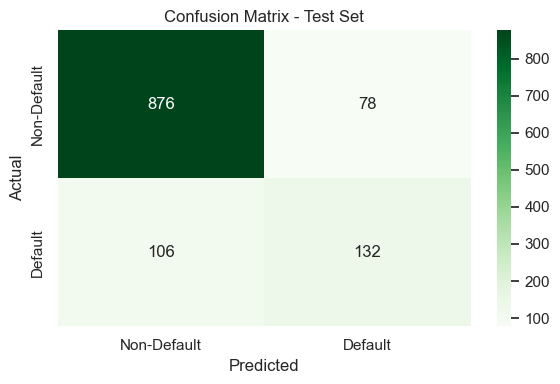

In [53]:

# Checking performance on the testing data
y_test_pred_tree = tree_model.predict(X_test_tree)

print( "Classification Report (Test Set):\n")
print(classification_report(y_test, y_test_pred_tree))

cm_test = confusion_matrix(y_test, y_test_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [55]:

# Choose the type of classifier


clf = DecisionTreeClassifier(random_state=42)

# Grid of parameters to choose from
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, {0: 0.2, 1: 0.8}]
}

# Type of scoring used to compare parameter combinations
scoring = 'f1'  # or use 'roc_auc', 'accuracy', 'recall'

# Run the grid search
grid_search = GridSearchCV(estimator=clf,
                           param_grid=param_grid,
                           scoring=scoring,
                           cv=5,
                           n_jobs=-1)

# Fit the GridSearch on train dataset
grid_search.fit(X_train_tree, y_train)

# Set the clf to the best combination of parameters
best_tree_model = grid_search.best_estimator_

# Fit the best algorithm to the data
best_tree_model.fit(X_train_tree, y_train)


DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       random_state=42)

Classification Report (Train Set - Tuned Model):

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      3817
           1       0.63      0.74      0.68       951

    accuracy                           0.86      4768
   macro avg       0.78      0.82      0.80      4768
weighted avg       0.87      0.86      0.86      4768



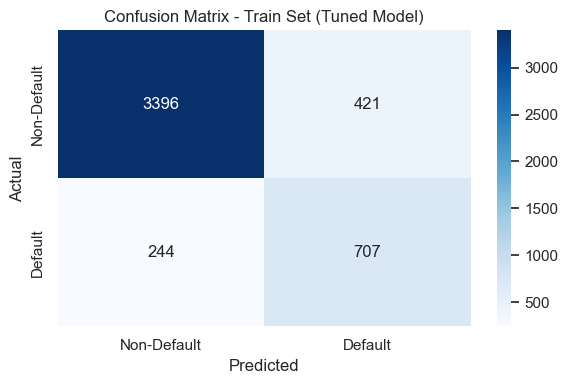

In [56]:

# Checking performance on the training data based on the tuned model

y_train_pred = best_tree_model.predict(X_train_tree)

print("Classification Report (Train Set - Tuned Model):\n")
print(classification_report(y_train, y_train_pred))

cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Train Set (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Classification Report (Test Set - Tuned Model):

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       954
           1       0.61      0.76      0.68       238

    accuracy                           0.86      1192
   macro avg       0.77      0.82      0.79      1192
weighted avg       0.87      0.86      0.86      1192



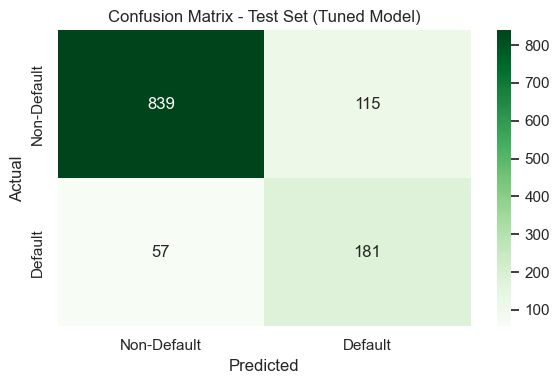

In [57]:

# Checking performance on the testing data based on the tuned model
y_test_pred = best_tree_model.predict(X_test_tree)

print("Classification Report (Test Set - Tuned Model):\n")
print(classification_report(y_test, y_test_pred))

cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Test Set (Tuned Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


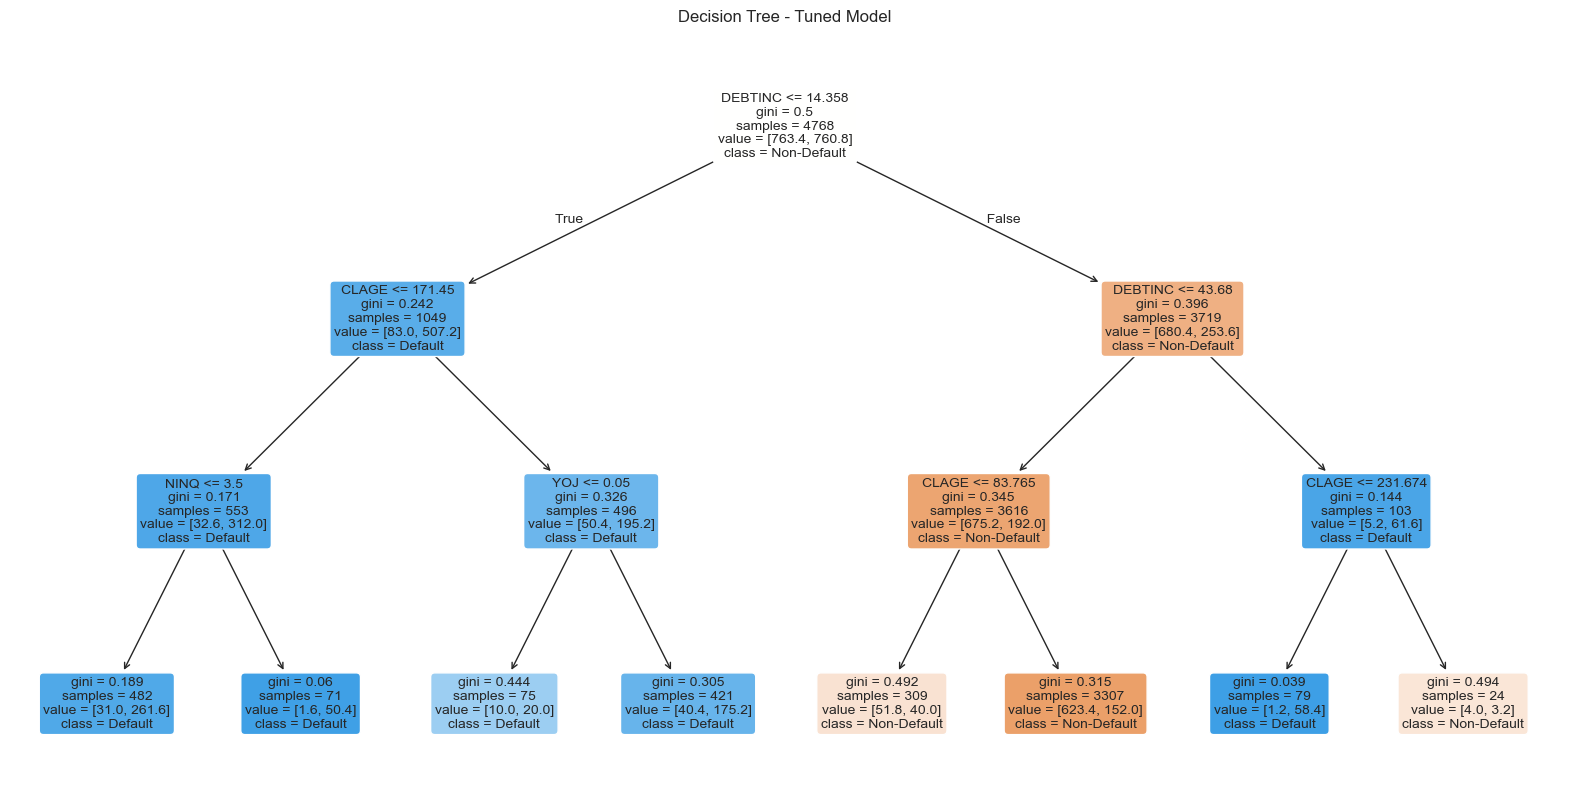

In [58]:
from sklearn.tree import plot_tree  # 
import matplotlib.pyplot as plt

# Set up the plot size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    best_tree_model,
    feature_names=X_train_tree.columns,
    class_names=['Non-Default', 'Default'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree - Tuned Model")
plt.show()




### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [60]:

# Defining Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,          # number of trees
    max_depth=None,            # allow full tree growth
    class_weight={0: 0.2, 1: 0.8},  # handle imbalance
    random_state=42,
    n_jobs=-1                  # use all processors
)

# Fit the model on the encoded training data
rf_model.fit(X_train_tree, y_train)


RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, n_jobs=-1,
                       random_state=42)

Classification Report (Train Set - Random Forest):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3817
           1       1.00      1.00      1.00       951

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



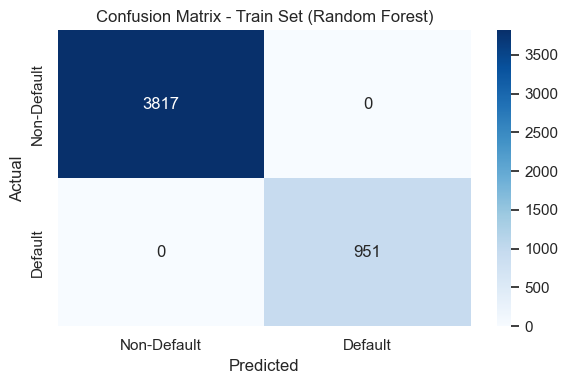

In [61]:

# Checking performance on the training dat

y_train_pred_rf = rf_model.predict(X_train_tree)

print("Classification Report (Train Set - Random Forest):\n")
print(classification_report(y_train, y_train_pred_rf))

cm_train_rf = confusion_matrix(y_train, y_train_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_train_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Train Set (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


Classification Report (Test Set - Random Forest):

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       954
           1       0.77      0.66      0.71       238

    accuracy                           0.89      1192
   macro avg       0.84      0.80      0.82      1192
weighted avg       0.89      0.89      0.89      1192



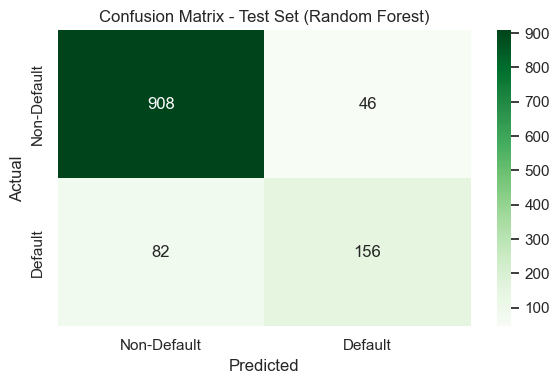

In [62]:

# Checking performance on test dataset
y_test_pred_rf = rf_model.predict(X_test_tree)

print("Classification Report (Test Set - Random Forest):\n")
print(classification_report(y_test, y_test_pred_rf))

cm_test_rf = confusion_matrix(y_test, y_test_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_test_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
plt.title("Confusion Matrix - Test Set (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


### **Random Forest Classifier Hyperparameter Tuning**

In [64]:
rf_base = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, {0: 0.2, 1: 0.8}]
}

# Define scoring metric
scoring = 'f1'  # or 'recall', 'roc_auc', etc.

# Create GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    scoring=scoring,
    cv=5,
    n_jobs=-1,
    verbose=1
)

#  Fit GridSearchCV on training data
grid_search_rf.fit(X_train_tree, y_train)

#  Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Print best parameters and score
print(" Best Parameters:", grid_search_rf.best_params_)
print(" Best CV Score (F1):", grid_search_rf.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
 Best Parameters: {'class_weight': {0: 0.2, 1: 0.8}, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
 Best CV Score (F1): 0.7093456343638009


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?


Model Comparison Results:

                 Model  Accuracy  Precision  Recall  F1 Score
2        Random Forest      0.89       0.70    0.76      0.73
1        Decision Tree      0.86       0.61    0.76      0.68
0  Logistic Regression      0.85       0.76    0.40      0.52


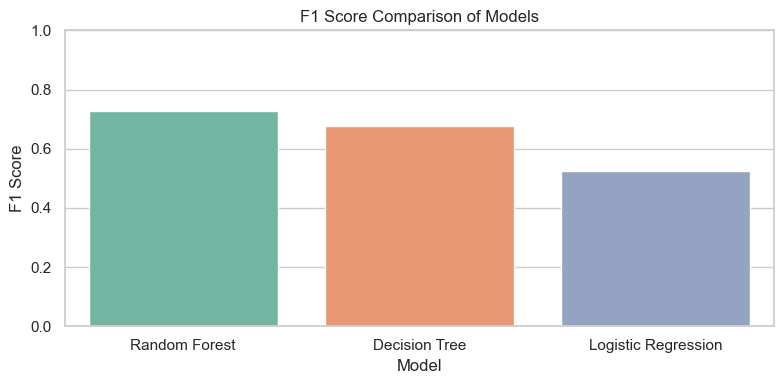

In [66]:

# Function to evaluate model metrics
def collect_metrics(name, model, X_test_data, y_test_data):
    if name == "Logistic Regression":
        # Encode and align test features for logistic regression
        X_test_data = pd.get_dummies(X_test_data, drop_first=True)
        X_test_data = X_test_data.reindex(columns=model.feature_names_in_, fill_value=0)

    y_pred = model.predict(X_test_data)

    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test_data, y_pred),
        'Precision': precision_score(y_test_data, y_pred),
        'Recall': recall_score(y_test_data, y_pred),
        'F1 Score': f1_score(y_test_data, y_pred)
    }

# Collect metrics from all models
results = []
results.append(collect_metrics("Logistic Regression", log_model, X_test, y_test))
results.append(collect_metrics("Decision Tree", best_tree_model, X_test_tree, y_test))
results.append(collect_metrics("Random Forest", best_rf_model, X_test_tree, y_test))

# Display as a DataFrame
results_df = pd.DataFrame(results).round(4)
results_df = results_df.sort_values(by="F1 Score", ascending=False)
print("\nModel Comparison Results:\n")
print(results_df)

# Optional: Visual plot
plt.figure(figsize=(8, 4))
sns.barplot(x='Model', y='F1 Score', data=results_df, palette='Set2')
plt.title('F1 Score Comparison of Models')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?


* Random Forest achieved the highest F1 score (0.73) and accuracy (0.89), showing strong balance between precision and recall.

* Decision Tree also performed reasonably well with an F1 score of 0.68, making it a simpler yet effective alternative.

* Logistic Regression, while having high precision (0.80), suffered from poor recall (0.25), indicating it's not suitable for detecting defaulters accurately.

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

## Recommended Model: Random Forest

Reason: It provides the best overall performance, especially in F1 score, which is crucial when both false positives and false negatives matter (like in loan default prediction). It also handles feature interactions and non-linearities better than logistic regression.

In [5]:
# Make sure to define 'columns' before using it
columns = X.columns

# ---- Logistic Regression ----
importances = np.abs(log_model.coef_[0])
importance_df = pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df.Importance.head(15), y=importance_df.index[:15])
plt.title("Top 15 Features - Logistic Regression")
plt.show()

# ---- Decision Tree ----
importances = best_tree_model.feature_importances_
importance_df = pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df.Importance.head(15), y=importance_df.index[:15])
plt.title("Top 15 Features - Decision Tree")
plt.show()

# ---- Random Forest ----
importances = best_rf_model.feature_importances_
importance_df = pd.DataFrame(importances, index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(13, 13))
sns.barplot(x=importance_df.Importance.head(15), y=importance_df.index[:15])
plt.title("Top 15 Features - Random Forest")
plt.show()



NameError: name 'X' is not defined